In [1]:
pip install yfinance pandas matplotlib seaborn statsmodels


Note: you may need to restart the kernel to use updated packages.


In [5]:
eth = yf.download('ETH-USD', start='2020-01-01', end='2024-12-31', interval='1d')

C:\Users\abdul\AppData\Local\Temp\ipykernel_20448\2736703582.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eth = yf.download('ETH-USD', start='2020-01-01', end='2024-12-31', interval='1d')
[*********************100%***********************]  1 of 1 completed


In [49]:
!pip install yfinance --upgrade

import yfinance as yf
import pandas as pd

# Fetching ETH-USD with fallback check
eth = yf.download('ETH-USD', start='2020-01-01', end='2024-12-31', interval='1d')

# Validate if data is returned
if eth.empty:
    print("Failed to fetch data. Try again later or check your internet.")
else:
    eth.reset_index(inplace=True)
    eth = eth[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    eth.dropna(inplace=True)
    eth.set_index('Date', inplace=True)
    print("Data fetched successfully.")
    print(eth.head())


  eth = yf.download('ETH-USD', start='2020-01-01', end='2024-12-31', interval='1d')

[*********************100%***********************]  1 of 1 completed

Data fetched successfully.
Price             Open        High         Low       Close       Volume
Ticker         ETH-USD     ETH-USD     ETH-USD     ETH-USD      ETH-USD
Date                                                                   
2020-01-01  129.630661  132.835358  129.198288  130.802002   7935230330
2020-01-02  130.820038  130.820038  126.954910  127.410179   8032709256
2020-01-03  127.411263  134.554016  126.490021  134.171707  10476845358
2020-01-04  134.168518  136.052719  133.040558  135.069366   7430904515
2020-01-05  135.072098  139.410202  135.045624  136.276779   7526675353


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load dataset
df = pd.read_csv("Downloads/ETH_USD_mock_data.csv")
df


,Date,Open,High,Low,Close,Volume,Market Cap
0,2020-01-01,217.49,217.51,198.06,210.43,20058,4.220891e+06
1,2020-01-02,208.82,222.02,195.67,208.17,84637,1.761880e+07
2,2020-01-03,222.05,230.98,205.32,221.62,88033,1.951012e+07
3,2020-01-04,256.99,262.98,243.48,252.58,80194,2.025567e+07
4,2020-01-05,256.18,253.76,235.14,248.40,86917,2.159021e+07
...,...,...,...,...,...,...,...
1822,2024-12-27,2695.13,2719.24,2698.14,2699.63,23409,6.319568e+07
1823,2024-12-28,2690.26,2682.70,2672.49,2687.13,79327,2.131621e+08
1824,2024-12-29,2693.01,2698.52,2679.01,2691.00,46639,1.255058e+08
1825,2024-12-30,2710.64,2708.63,2694.66,2700.34,73627,1.988182e+08


In [7]:
# DATA PREPROCESSING

In [8]:
 #Cleanup the Cloumns

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')  # normalize names
print("Columns after cleanup:", df.columns.tolist())

Columns after cleanup: ['date', 'open', 'high', 'low', 'close', 'volume', 'market_cap']


In [9]:
# Date formatting and indexing

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)
df.sort_values('date', inplace=True)
df.set_index('date', inplace=True)


In [10]:
# Drop duplicates
df = df[~df.index.duplicated(keep='first')]

In [11]:
# Check & fill missing values

print("Missing values before handling:\n", df.isnull().sum())
df.fillna(method='ffill', inplace=True)  # forward fill for time series
df.dropna(inplace=True)  # drop remaining


Missing values before handling:
 open          0
high          0
low           0
close         0
volume        0
market_cap    0
dtype: int64


C:\Users\abdul\AppData\Local\Temp\ipykernel_20448\3715188781.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # forward fill for time series


In [12]:
# Add Market Cap
df['market_cap'] = df['close'] * df['volume']
df

,open,high,low,close,volume,market_cap
date,,,,,,
2020-01-01,217.49,217.51,198.06,210.43,20058,4.220805e+06
2020-01-02,208.82,222.02,195.67,208.17,84637,1.761888e+07
2020-01-03,222.05,230.98,205.32,221.62,88033,1.950987e+07
2020-01-04,256.99,262.98,243.48,252.58,80194,2.025540e+07
2020-01-05,256.18,253.76,235.14,248.40,86917,2.159018e+07
...,...,...,...,...,...,...
2024-12-27,2695.13,2719.24,2698.14,2699.63,23409,6.319564e+07
2024-12-28,2690.26,2682.70,2672.49,2687.13,79327,2.131620e+08
2024-12-29,2693.01,2698.52,2679.01,2691.00,46639,1.255055e+08


In [13]:
# Add returns & volatility

df['daily_return'] = df['close'].pct_change()
df['log_return'] = np.log(df['close'] / df['close'].shift(1))
df['volatility'] = df['log_return'].rolling(window=7).std() * np.sqrt(7)

C:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
# Optional Outlier Detection (Z-score)

z_scores = zscore(df[['open', 'high', 'low', 'close', 'volume']])
df = df[(np.abs(z_scores) < 3).all(axis=1)] 

In [15]:
# Final inspection
print(df.info())
print(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-01-01 to 2024-12-31
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          1827 non-null   float64
 1   high          1827 non-null   float64
 2   low           1827 non-null   float64
 3   close         1827 non-null   float64
 4   volume        1827 non-null   int64  
 5   market_cap    1827 non-null   float64
 6   daily_return  1826 non-null   float64
 7   log_return    1816 non-null   float64
 8   volatility    1784 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 207.3 KB
None
               count          mean           std           min           25%  \
open          1827.0  1.184451e+03  9.014201e+02 -1.696000e+01  3.920900e+02   
high          1827.0  1.194711e+03  9.012299e+02 -1.025000e+01  4.043750e+02   
low           1827.0  1.174682e+03  9.014951e+02 -2.908000e+01  3.838400e+02   
close         1827.0  1.18

In [16]:
# Save clean version
df_cleaned_path = "Downloads/ETH_USD_cleaned.csv"
df.to_csv(df_cleaned_path)

df_cleaned_path

'Downloads/ETH_USD_cleaned.csv'

In [17]:
# Exploratory Data Analysis

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("Downloads/ETH_USD_cleaned.csv", parse_dates=["date"])
df.set_index("date", inplace=True)

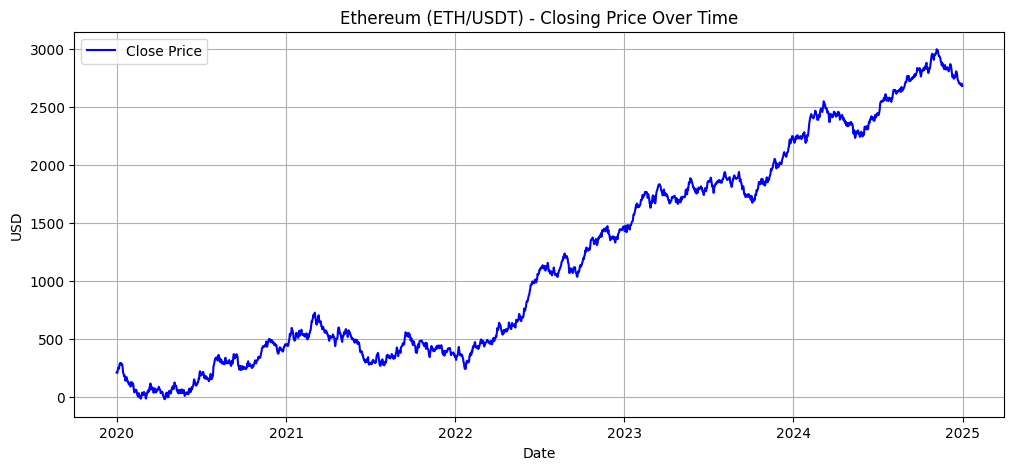

In [19]:
# Plot closing price over time
plt.figure(figsize=(12, 5))
plt.plot(df['close'], label='Close Price', color='blue')
plt.title("Ethereum (ETH/USDT) - Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("USD")
plt.grid(True)
plt.legend()
plt.show()

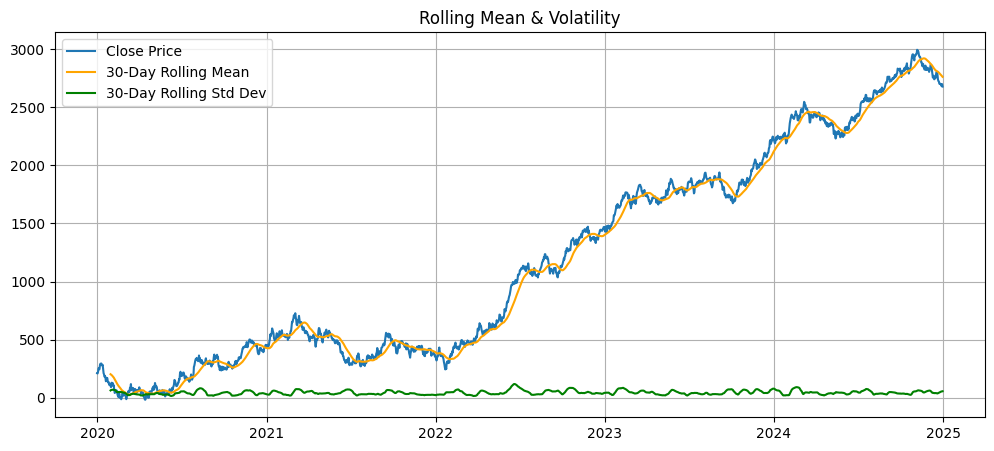

In [20]:
# Rolling mean and volatility 
plt.figure(figsize=(12, 5))
plt.plot(df['close'], label='Close Price')
plt.plot(df['close'].rolling(30).mean(), label='30-Day Rolling Mean', color='orange')
plt.plot(df['close'].rolling(30).std(), label='30-Day Rolling Std Dev', color='green')
plt.title("Rolling Mean & Volatility")
plt.legend()
plt.grid(True)
plt.show()


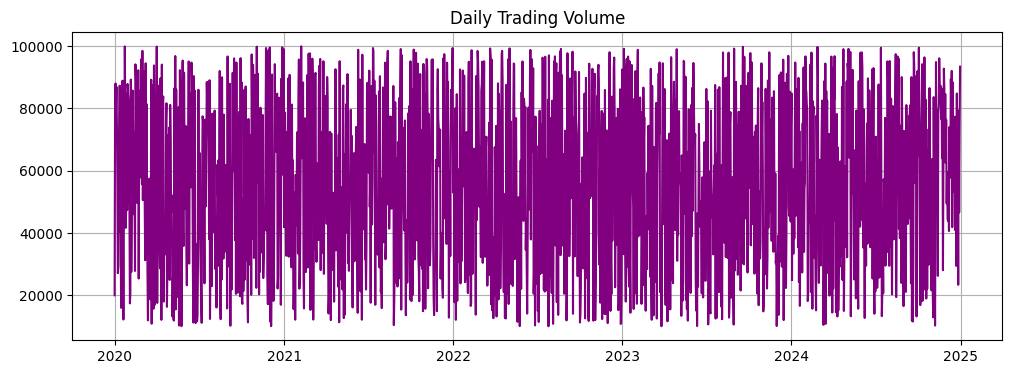

In [21]:
# Volume trend
plt.figure(figsize=(12, 4))
plt.plot(df['volume'], color='purple')
plt.title("Daily Trading Volume")
plt.grid(True)
plt.show()

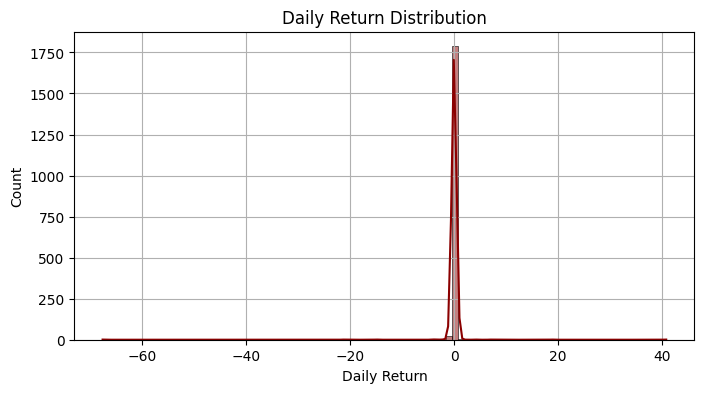

In [22]:
# Returns distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['daily_return'].dropna(), bins=100, kde=True, color='darkred')
plt.title("Daily Return Distribution")
plt.xlabel("Daily Return")
plt.grid(True)
plt.show()


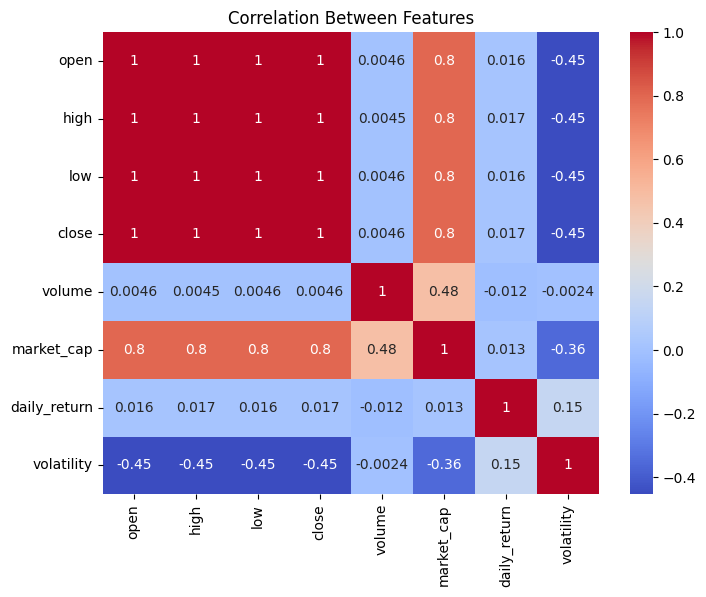

In [23]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['open', 'high', 'low', 'close', 'volume', 'market_cap', 'daily_return', 'volatility']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

C:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\abdul\AppData\Local\Temp\ipykernel_20448\785390357.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['volatility'].fillna(method='bfill', inplace=True)
C:\Users\abdul\AppData\Local\Temp\ipykernel_20448\785390357.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Us

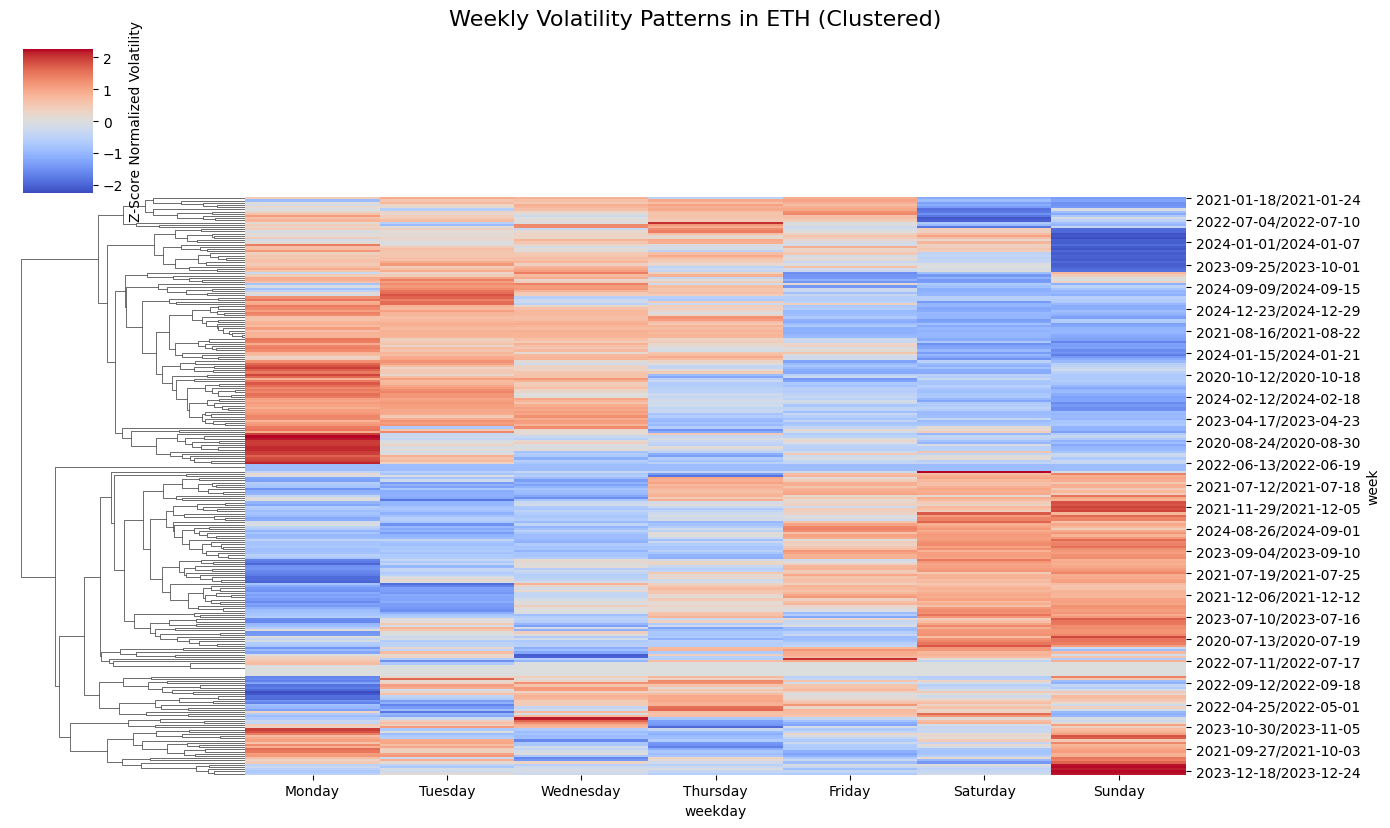

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Volatility Calculation ---
df['log_return'] = np.log(df['close'] / df['close'].shift(1))
df['volatility'] = df['log_return'].rolling(window=14).std() * np.sqrt(14)
df['volatility'].fillna(method='bfill', inplace=True)

# --- 2. Add Week and Day ---
df['weekday'] = df.index.day_name()
df['week'] = df.index.to_period('W')

# --- 3. Pivot Table (week vs. weekday) ---
pivot = df.pivot_table(index='week', columns='weekday', values='volatility', aggfunc='mean')

# Reorder days (important!)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot[ordered_days]

# --- 4. Normalize (z-score row-wise) to enhance contrast ---
pivot_norm = (pivot - pivot.mean(axis=1).values.reshape(-1, 1)) / pivot.std(axis=1).values.reshape(-1, 1)

# --- 5. Plot as ClusterMap for smart groupings ---
sns.clustermap(
    pivot_norm.fillna(0),  # Fill NaNs for clustering
    cmap='coolwarm',
    figsize=(14, 8),
    col_cluster=False,
    yticklabels=10,
    cbar_kws={'label': 'Z-Score Normalized Volatility'}
)

plt.suptitle("Weekly Volatility Patterns in ETH (Clustered)", fontsize=16, y=1.03)
plt.show()


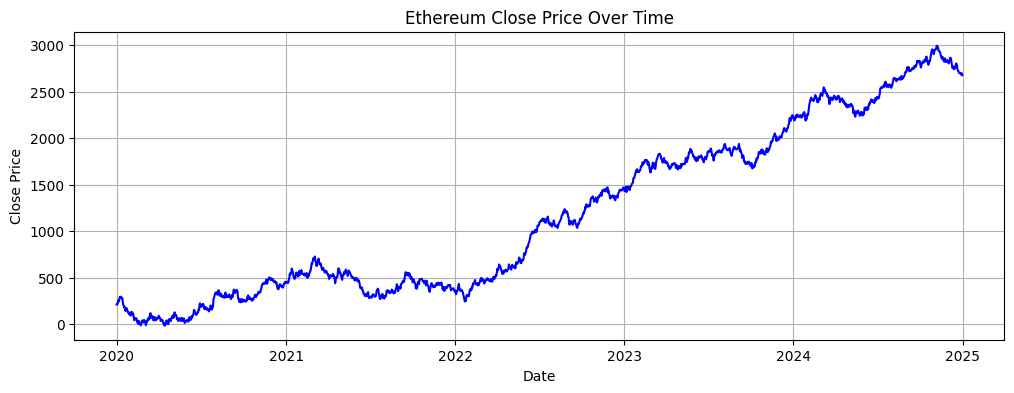

In [25]:
# STATIONARY TESTING
#IF p-value < 0.05

from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Plot Original Close Price Series 
plt.figure(figsize=(12, 4))
plt.plot(df['close'], color='blue')
plt.title("Ethereum Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

In [26]:
# Perform Augmented Dickey-Fuller Test on Original Series
adf_result = adfuller(df['close'])
print("ADF Test on Original Close Price")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

ADF Test on Original Close Price
ADF Statistic: 0.3737
p-value: 0.9805
Critical Value (1%): -3.4339
Critical Value (5%): -2.8631
Critical Value (10%): -2.5676


In [27]:
# Interpretation
if adf_result[1] < 0.05:
    print("\n Series is stationary (p < 0.05). Proceed without differencing.")
else:
    print("\n Series is NOT stationary (p ≥ 0.05). Differencing is needed.")


 Series is NOT stationary (p ≥ 0.05). Differencing is needed.


In [28]:
#IF P-value >= 0.05

In [29]:
# First Order Differencing
df['diff_close'] = df['close'].diff()

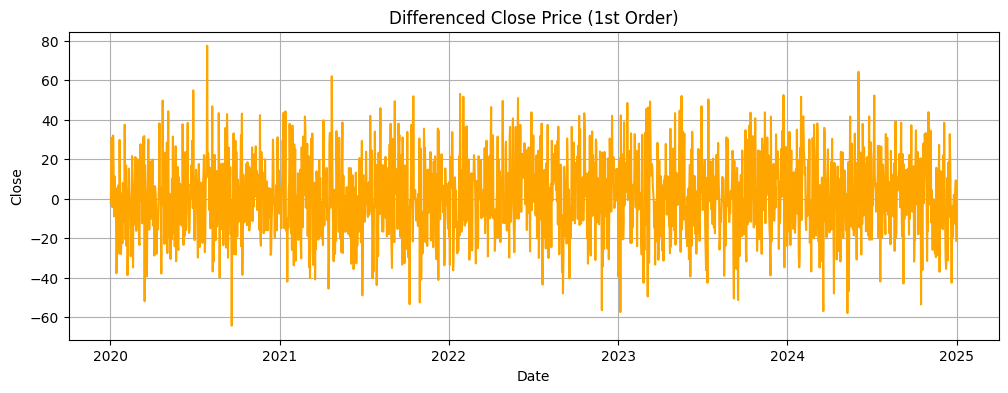

In [30]:
# Plot Differenced Series
plt.figure(figsize=(12, 4))
plt.plot(df['diff_close'], color='orange')
plt.title("Differenced Close Price (1st Order)")
plt.xlabel("Date")
plt.ylabel("Close")
plt.grid(True)
plt.show()

In [31]:
# ADF Test on Differenced Series

adf_diff_result = adfuller(df['diff_close'].dropna())

print("ADF Test After First Differencing")
print(f"ADF Statistic: {adf_diff_result[0]:.4f}")
print(f"p-value: {adf_diff_result[1]:.4f}")
for key, value in adf_diff_result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

if adf_diff_result[1] < 0.05:
    print("\nSeries is now stationary. We'll set d = 1 for ARIMA.")
else:
    print("\nStill not stationary — consider higher differencing.")

ADF Test After First Differencing
ADF Statistic: -42.7591
p-value: 0.0000
Critical Value (1%): -3.4339
Critical Value (5%): -2.8631
Critical Value (10%): -2.5676

Series is now stationary. We'll set d = 1 for ARIMA.


<Figure size 1200x400 with 0 Axes>

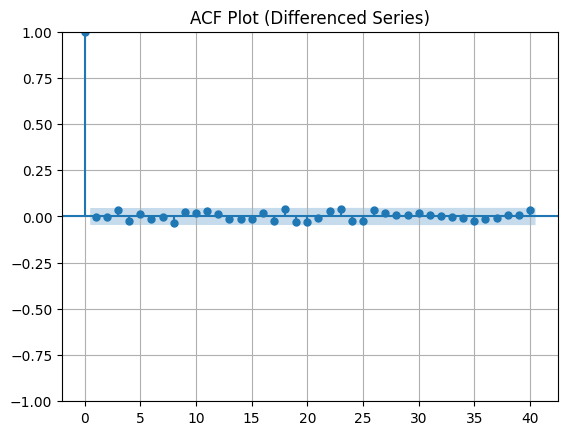

<Figure size 1200x400 with 0 Axes>

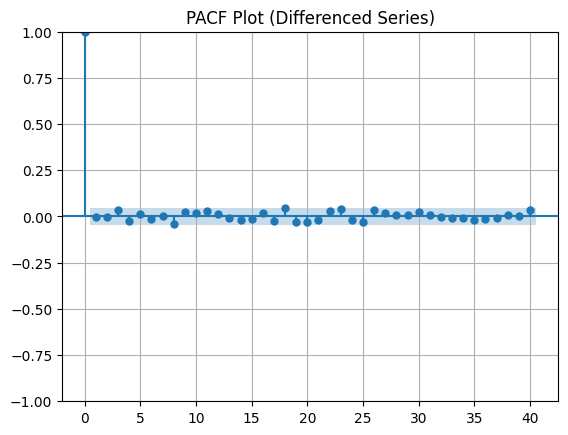

In [32]:
# ACF ANF PACF PLOTS FOR P AND Q 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Ensure differenced data is used
diff_series = df['diff_close'].dropna()

# ACF Plot
plt.figure(figsize=(12, 4))
plot_acf(diff_series, lags=40)
plt.title("ACF Plot (Differenced Series)")
plt.grid(True)
plt.show()

# PACF Plot
plt.figure(figsize=(12, 4))
plot_pacf(diff_series, lags=40, method='ywm')
plt.title("PACF Plot (Differenced Series)")
plt.grid(True)
plt.show()




In [33]:
# ARIMA TRAINING 

In [34]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [35]:
# Use 'close' series and drop NA from differencing
close_series = df['close'].dropna()

# Split data into train/test (e.g., last 30 days as test)
train = close_series[:-30]
test = close_series[-30:]

In [36]:
# --- Model 1: ARIMA(1,1,0) ---
model_110 = ARIMA(train, order=(1, 1, 0))
result_110 = model_110.fit()

# Forecast
forecast_110 = result_110.forecast(steps=30)
rmse_110 = np.sqrt(mean_squared_error(test, forecast_110))

C:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [37]:
# --- Model 2: ARIMA(0,1,1) ---
model_011 = ARIMA(train, order=(0, 1, 1))
result_011 = model_011.fit()

# Forecast
forecast_011 = result_011.forecast(steps=30)
rmse_011 = np.sqrt(mean_squared_error(test, forecast_011))

C:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [38]:
# --- Compare Results ---
print("ARIMA(1,1,0):")
print(f"AIC: {result_110.aic:.2f}, RMSE: {rmse_110:.4f}")

print("\nARIMA(0,1,1):")
print(f"AIC: {result_011.aic:.2f}, RMSE: {rmse_011:.4f}")

ARIMA(1,1,0):
AIC: 15832.42, RMSE: 79.6168

ARIMA(0,1,1):
AIC: 15832.42, RMSE: 79.6175


In [39]:
# Choose best model
if result_011.aic < result_110.aic:
    best_model = result_011
    best_order = (0, 1, 1)
    best_forecast = forecast_011
else:
    best_model = result_110
    best_order = (1, 1, 0)
    best_forecast = forecast_110

print(f"\nSelected Best ARIMA Order: {best_order}")


Selected Best ARIMA Order: (0, 1, 1)


In [40]:
#MODEL EVALUATION

In [41]:
from sklearn.metrics import mean_absolute_percentage_error

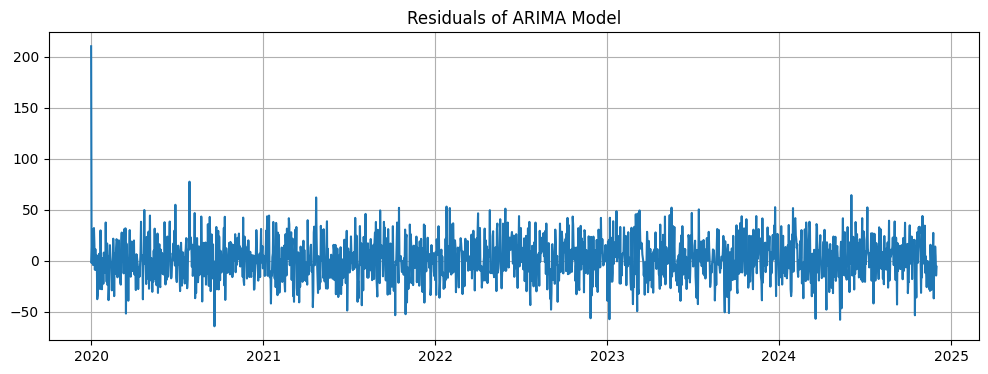

In [42]:
# --- Residuals ---
residuals = best_model.resid

# --- Plot Residuals ---
plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.grid(True)
plt.show()


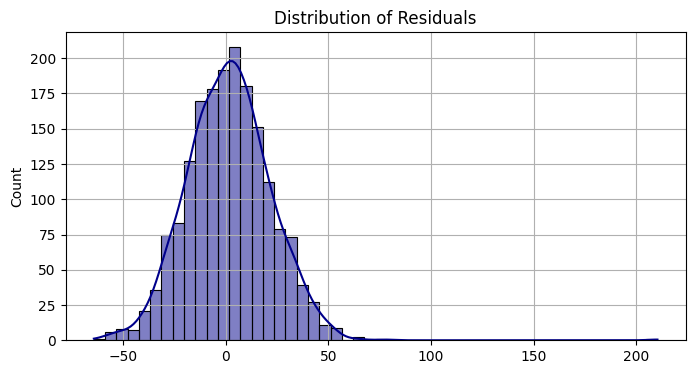

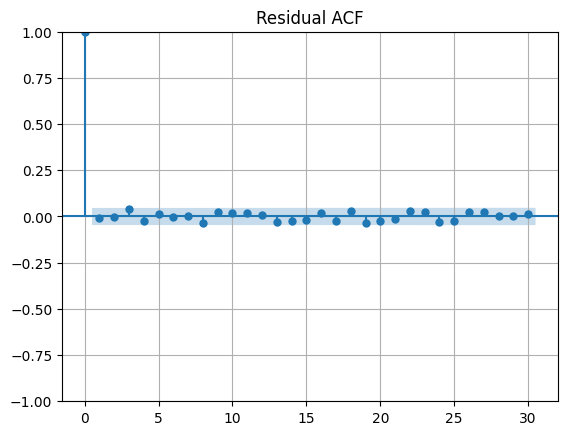

In [43]:
# Residual Distribution
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=50, kde=True, color="darkblue")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()

# Residual ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals.dropna(), lags=30)
plt.title("Residual ACF")
plt.grid(True)
plt.show()

In [44]:
# MAPE
mape = mean_absolute_percentage_error(test, best_forecast)
print(f"MAPE: {mape * 100:.2f}%")

MAPE: 2.46%


In [45]:
# Forecasting 

C:\Users\abdul\AppData\Local\Temp\ipykernel_20448\437993261.py:24: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


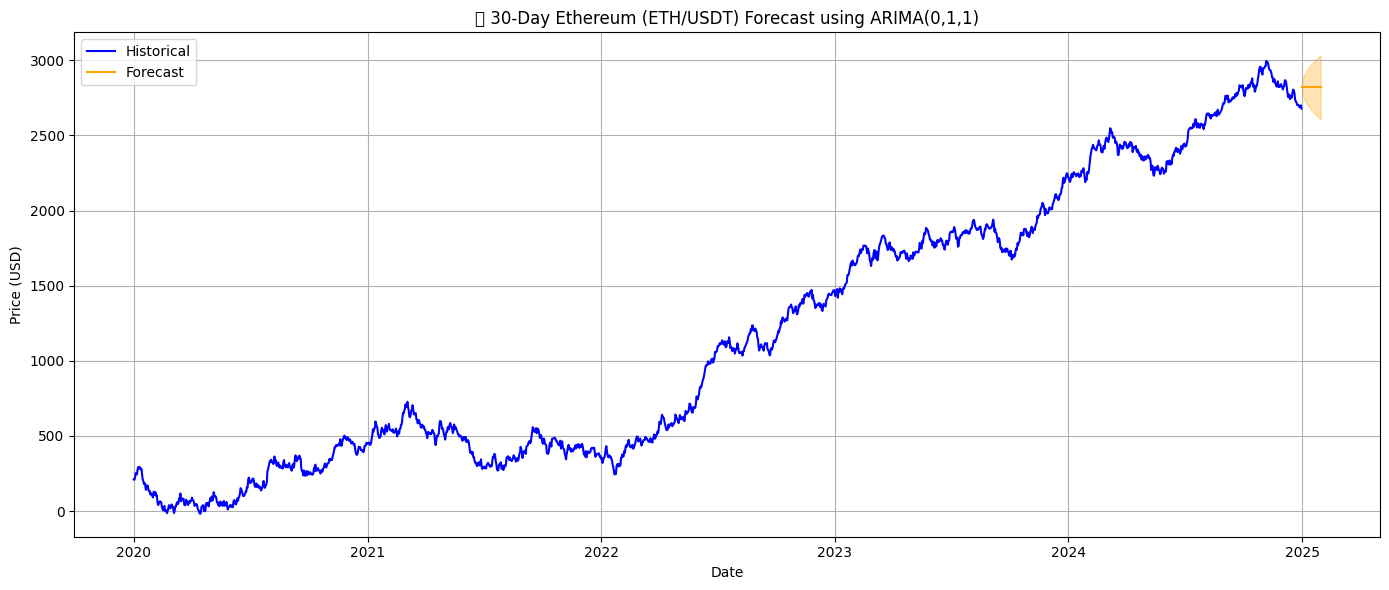

In [46]:
# Forecast next 30 days with confidence intervals
forecast_result = best_model.get_forecast(steps=30)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

# Create future dates
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Re-index forecast
forecast_mean.index = forecast_index
forecast_ci.index = forecast_index

# Plot forecast
plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Historical', color='blue')
plt.plot(forecast_mean, label='Forecast', color='orange')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.3)
plt.title("🔮 30-Day Ethereum (ETH/USDT) Forecast using ARIMA(0,1,1)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\abdul\AppData\Local\Temp\ipykernel_20448\2086725846.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\abdul\AppData\Local\Temp\ipykernel_20448\2086725846.py:12: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\abdul\AppData\Local\Temp\ipykernel_20448\2086725846.py:12: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


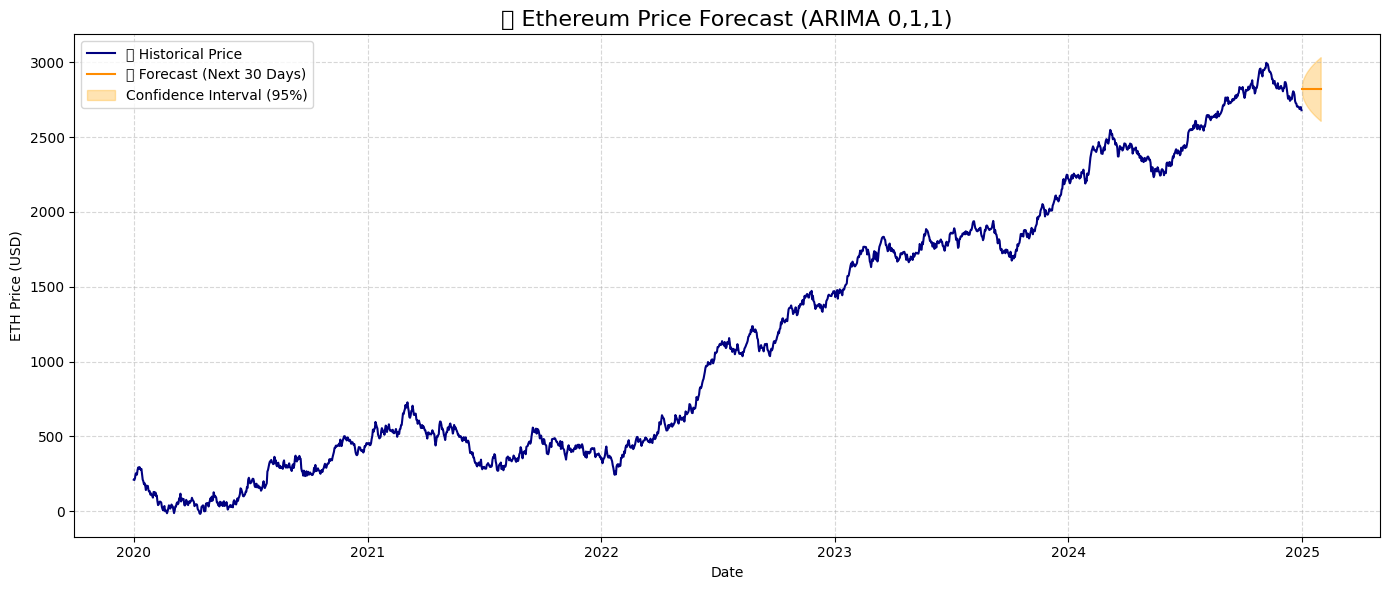

In [47]:
plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='📘 Historical Price', color='navy')
plt.plot(forecast_mean, label='🔮 Forecast (Next 30 Days)', color='darkorange')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1],
                 color='orange', alpha=0.3, label='Confidence Interval (95%)')

plt.title("📈 Ethereum Price Forecast (ARIMA 0,1,1)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("ETH Price (USD)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
